In [3]:
###Import necessary libraries
###0.1 Adjusting Screen Width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [5]:
####0.2 Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
####0.3 Import Necessary Python Libraries
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [8]:
###Step 1: Reading & Understanding the data
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\pabitra.guchhait\\OneDrive - Accenture\\Personal\\Masters\\ML_Modules\\Industry\\BikeAssignment'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\pabitra.guchhait\OneDrive - Accenture\Personal\Masters\ML_Modules\Industry\BikeAssignment\day.csv


In [10]:
###1.1 Importing the Data
bike = pd.read_csv("C:\\Users\\pabitra.guchhait\\OneDrive - Accenture\\Personal\\Masters\\ML_Modules\\Industry\\BikeAssignment\\day.csv", parse_dates=['dteday'])

In [11]:
### 1.2 Inspecting the Dataframe
# Checking the top 5 rows of the dataframe
bike.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01       1   0     1        0        1           1   
1        2 2018-02-01       1   0     1        0        2           1   
2        3 2018-03-01       1   0     1        0        3           1   
3        4 2018-04-01       1   0     1        0        4           1   
4        5 2018-05-01       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [12]:
# Checking the last 5 rows of the dataframe
bike.tail()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726 2019-12-27       1   1    12        0        5           1   
726      727 2019-12-28       1   1    12        0        6           0   
727      728 2019-12-29       1   1    12        0        0           0   
728      729 2019-12-30       1   1    12        0        1           1   
729      730 2019-12-31       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

In [14]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

In [15]:
# Checking the size of the dataframe
bike.size

11680

In [16]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.4 KB


In [17]:
#Checking the numerical columns data distribution statistics
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

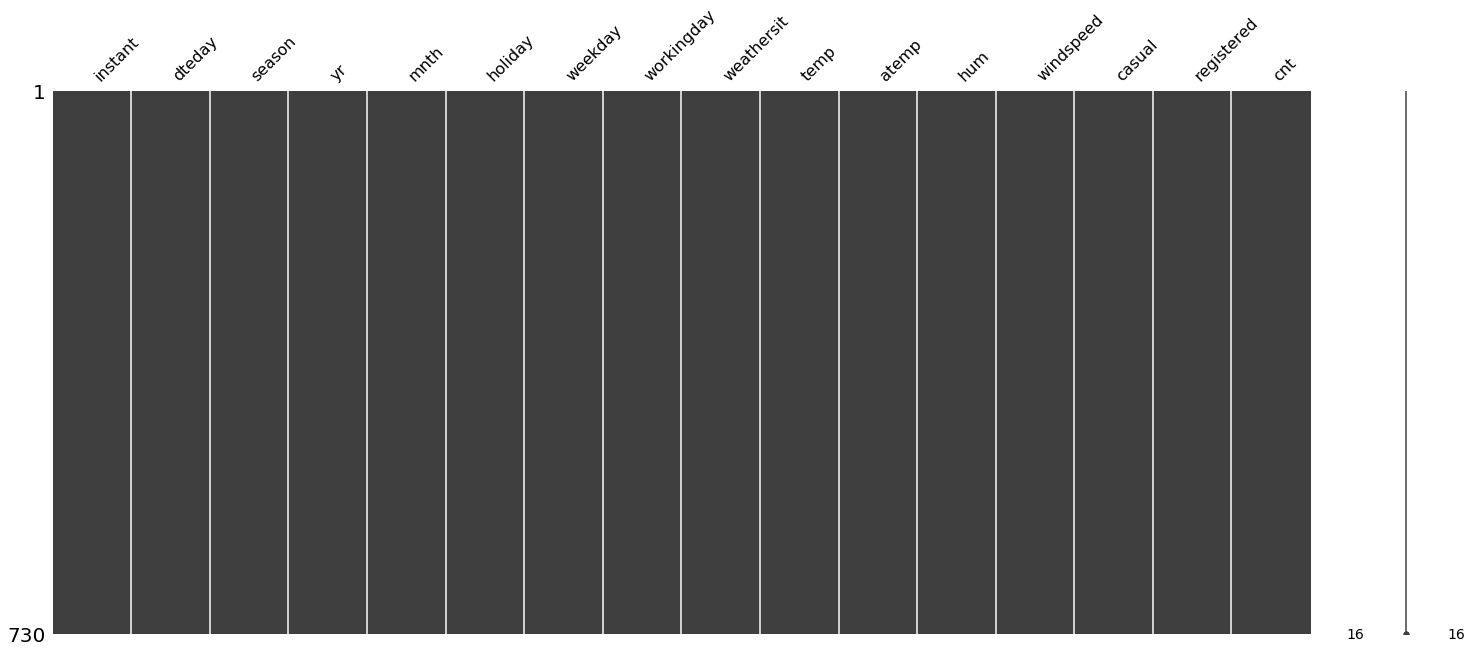

In [19]:
###1.3 Data quality check
# To check if there are any missing values in the dataset

import missingno as mn
mn.matrix(bike)

In [20]:
####1.4 Duplicate Checking
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

<function matplotlib.pyplot.show(*args, **kw)>

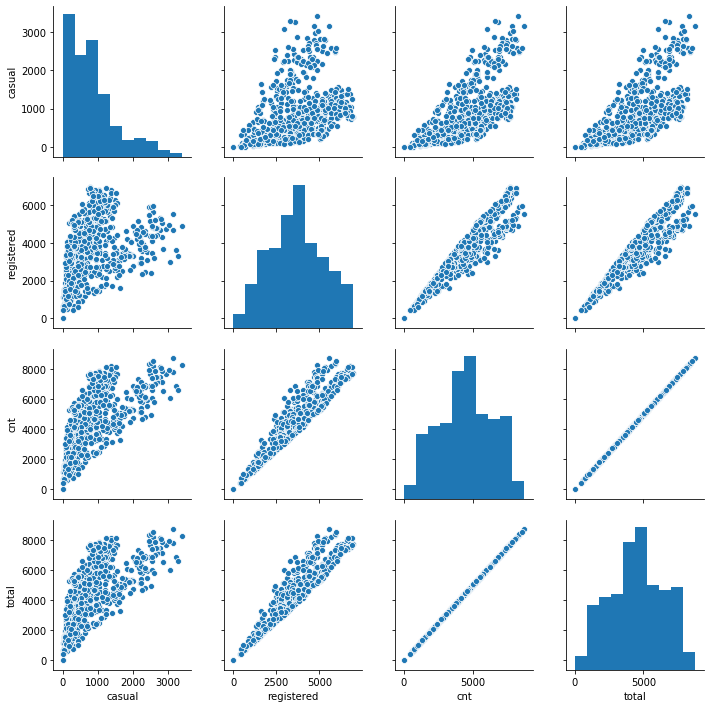

In [21]:
####1.5 Removing Redundant columns

# Checking the relationship between casual, registered and cnt column
bike_cnt = bike[['casual','registered','cnt']]
# Creating a column whch will show the value of casual + registered
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']
sns.pairplot(bike_cnt)
plt.show

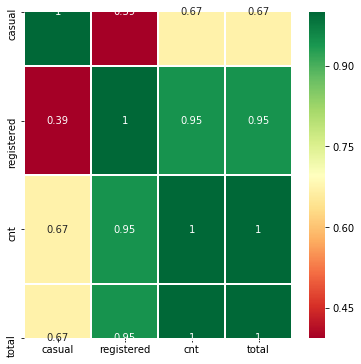

In [22]:
# also checking the correlation of the variables 
plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [23]:
#dropping the unwanted columns
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

In [24]:
#### Step 2: Encoding & Visualizing the data
#### 2.1 Encoding Categorical columns
####season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
####mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
####weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
####weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat

In [25]:
#Converting season
bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [26]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

Jan    0.084932
Oct    0.084932
May    0.084932
Jul    0.084932
Mar    0.084932
Aug    0.084932
Dec    0.084932
Nov    0.082192
Sep    0.082192
Jun    0.082192
Apr    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [27]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [28]:
#Converting weathersit
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Thursday     0.142466
Saturday     0.142466
Wednesday    0.142466
Sunday       0.142466
Friday       0.142466
Name: weekday, dtype: float64

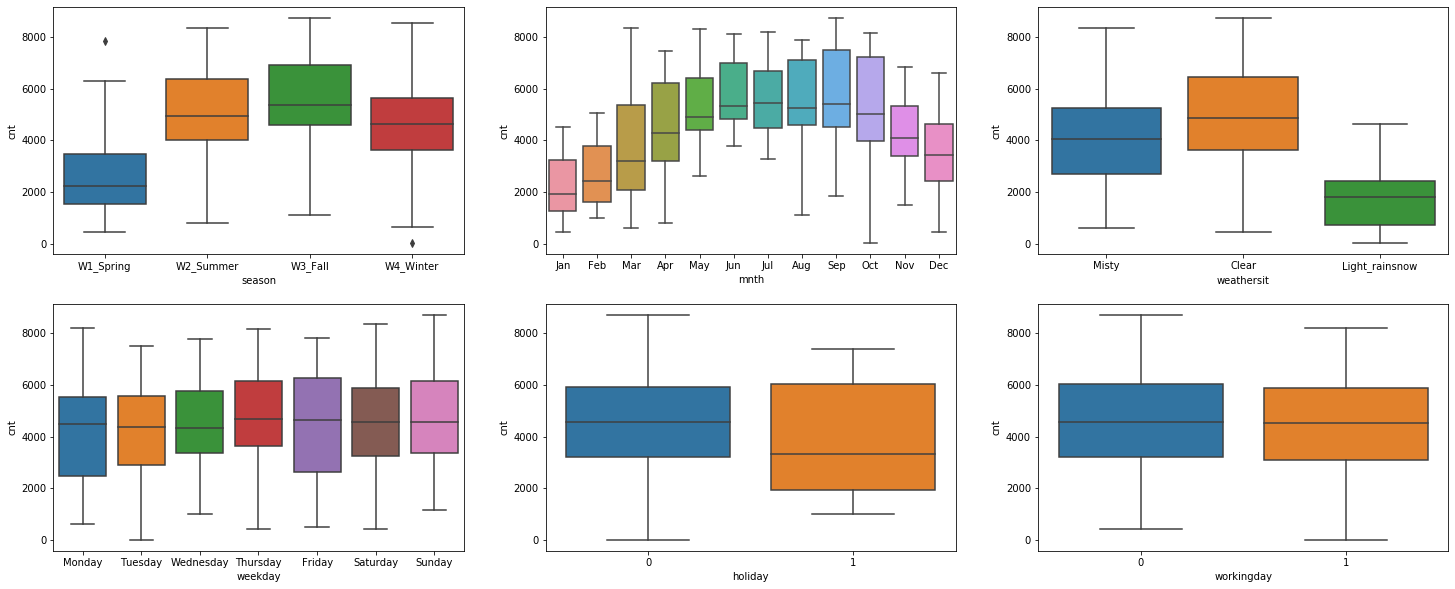

In [30]:
#2.2 Categorical Variable Analysis
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [31]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [32]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [33]:
###2.2.1 Season :
categorical_stats('season')

sum     mean  count  sum_perc  count_perc
season                                                  
W3_Fall    1061129  5644.30    188     32.24       25.75
W2_Summer   918589  4992.33    184     27.91       25.21
W4_Winter   841613  4728.16    178     25.57       24.38
W1_Spring   469514  2608.41    180     14.27       24.66

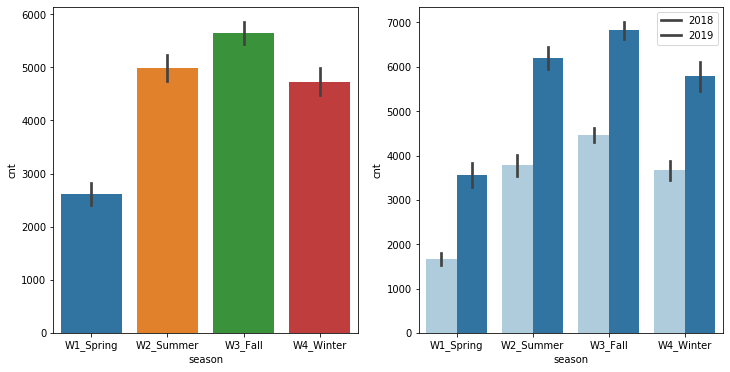

In [34]:
categorical_plot('season',12,6)

In [35]:
### 2.2.2 Month :
categorical_stats('mnth')

sum     mean  count  sum_perc  count_perc
mnth                                              
Aug   351194  5664.42     62     10.67        8.49
Jun   346342  5772.37     60     10.52        8.22
Sep   345991  5766.52     60     10.51        8.22
Jul   344948  5563.68     62     10.48        8.49
May   331686  5349.77     62     10.08        8.49
Oct   322352  5199.23     62      9.80        8.49
Apr   269094  4484.90     60      8.18        8.22
Nov   254831  4247.18     60      7.74        8.22
Mar   228920  3692.26     62      6.96        8.49
Dec   211036  3403.81     62      6.41        8.49
Feb   149518  2669.96     56      4.54        7.67
Jan   134933  2176.34     62      4.10        8.49

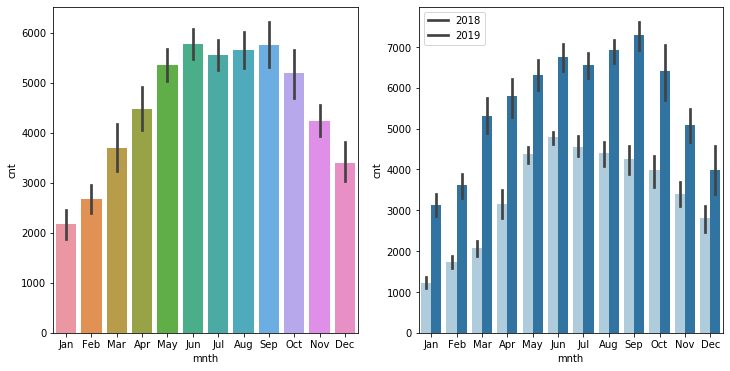

In [36]:
categorical_plot('mnth',12,6)

In [37]:
###2.2.3 Weather:
categorical_stats('weathersit')

sum     mean  count  sum_perc  count_perc
weathersit                                                   
Clear           2257952  4876.79    463     68.61       63.42
Misty            995024  4044.81    246     30.24       33.70
Light_rainsnow    37869  1803.29     21      1.15        2.88

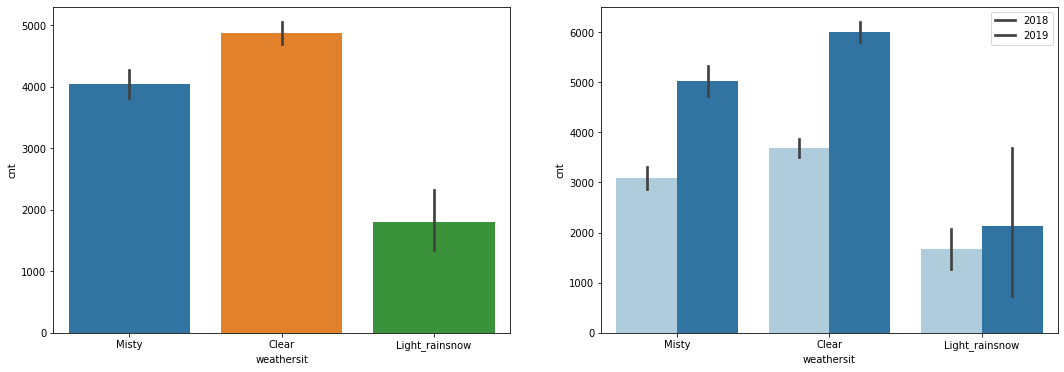

In [38]:
categorical_plot('weathersit',18,6)

In [39]:
###2.2.4 Weekday :
categorical_stats('weekday')

sum     mean  count  sum_perc  count_perc
weekday                                                
Thursday   487923  4691.57    104     14.83       14.25
Sunday     485235  4665.72    104     14.74       14.25
Saturday   481176  4626.69    104     14.62       14.25
Friday     478132  4597.42    104     14.53       14.25
Wednesday  462276  4444.96    104     14.05       14.25
Tuesday    448822  4274.50    105     13.64       14.38
Monday     447281  4259.82    105     13.59       14.38

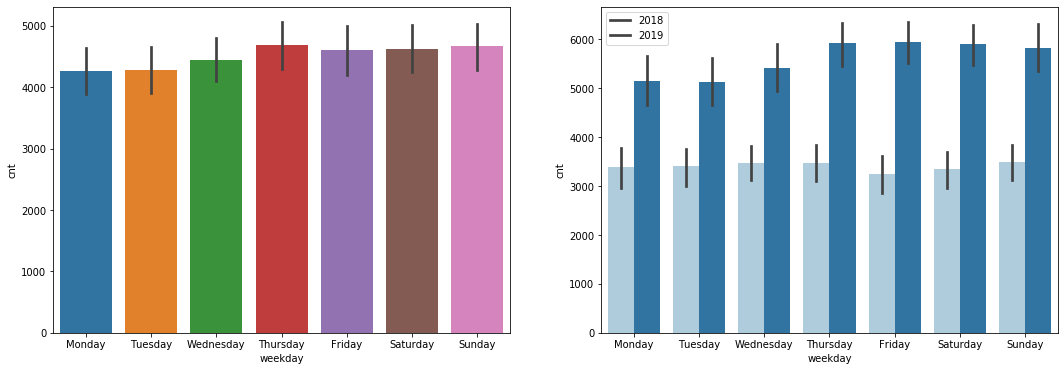

In [40]:
categorical_plot('weekday',18,6)

In [41]:
####2.2.5 Holiday :
categorical_stats('holiday')

sum    mean  count  sum_perc  count_perc
holiday                                              
0        3212410  4530.9    709     97.62       97.12
1          78435  3735.0     21      2.38        2.88

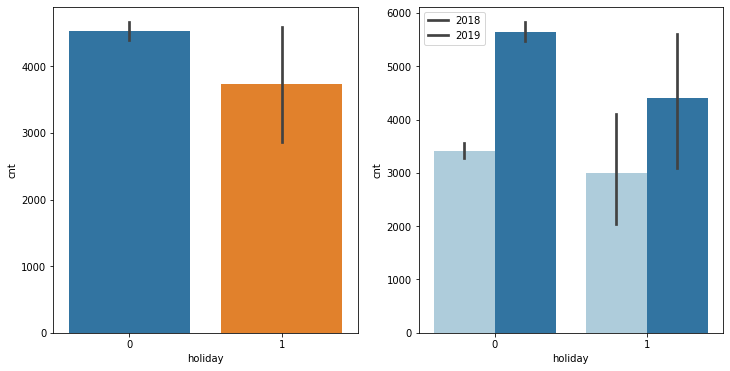

In [42]:
categorical_plot('holiday',12,6)

In [43]:
###2.2.6 Working Day :
categorical_stats('workingday')

sum     mean  count  sum_perc  count_perc
workingday                                               
1           2253988  4472.20    504     68.49       69.04
0           1036857  4587.86    226     31.51       30.96

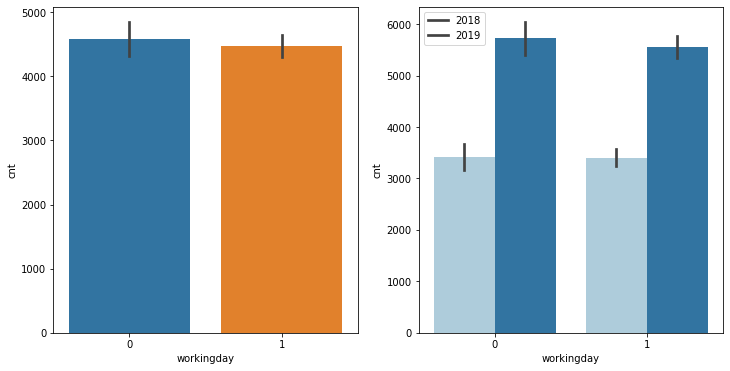

In [44]:
categorical_plot('workingday',12,6)

In [45]:
###2.2.7 Year :
categorical_stats('yr')

sum     mean  count  sum_perc  count_perc
yr                                               
1   2047742  5610.25    365     62.23        50.0
0   1243103  3405.76    365     37.77        50.0

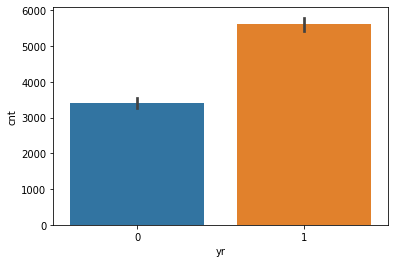

In [46]:
sns.barplot('yr','cnt',data=bike)
plt.show()

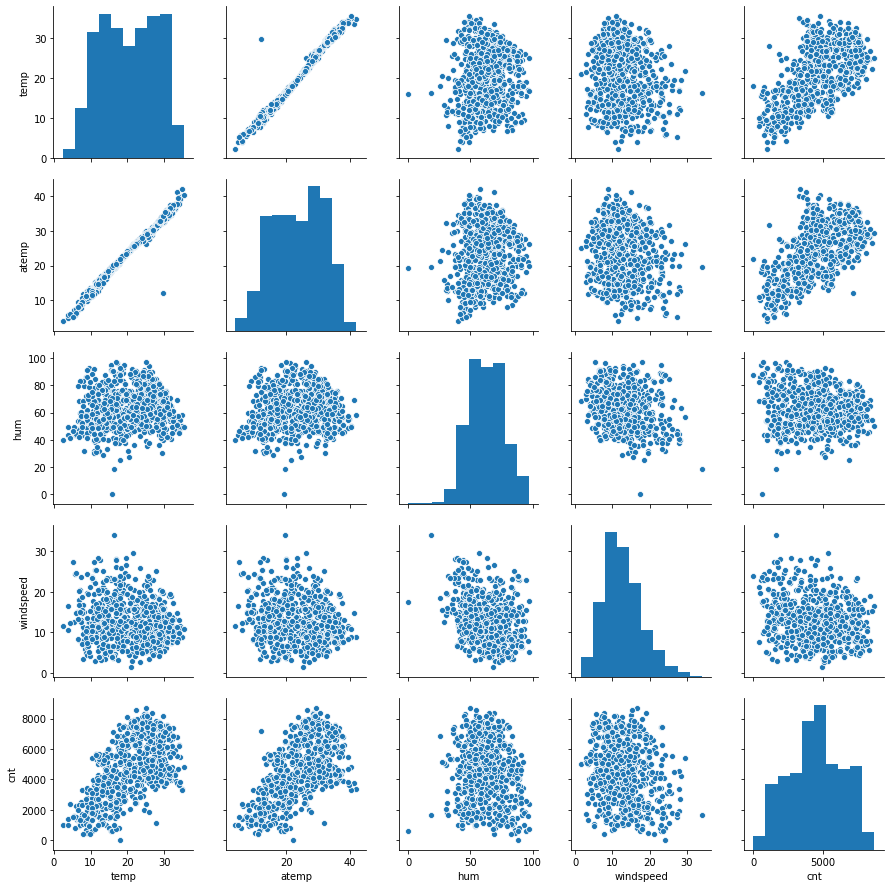

In [47]:
#### 2.3 Numerical Variable Analysis
#Generating pairplot to check the relationships between numeric variables variables
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

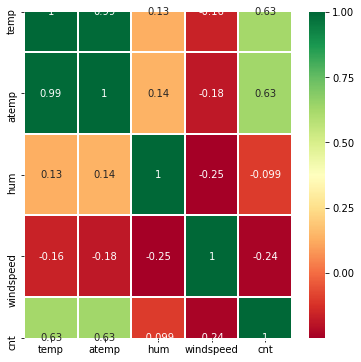

In [48]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

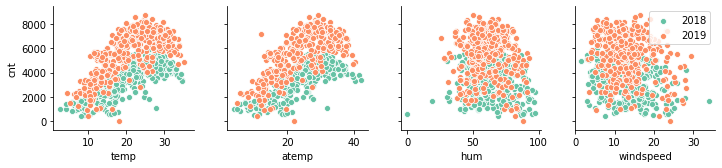

In [49]:
# Checking the impact of year against the numerical variable : 
ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

In [50]:
### Step 3: Data Preparation
### 3.1 Dummy Variable Creation

### Season
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

W2_Summer  W3_Fall  W4_Winter
0          0        0          0
1          0        0          0
2          0        0          0

In [51]:
### Weather
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

Light_rainsnow  Misty
0               0      1
1               0      1
2               0      0

In [52]:
### Month
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0

In [53]:
### Weekday
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       1         0       0         0        0          0
1       0         0       0         0        1          0
2       0         0       0         0        0          1

In [54]:
### 3.2 Merging the Dataframes
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0  W1_Spring   0  Jan        0     Monday           1      Misty  14.110847   
1  W1_Spring   0  Jan        0    Tuesday           1      Misty  14.902598   
2  W1_Spring   0  Jan        0  Wednesday           1      Clear   8.050924   

      atemp      hum  ...  Oct  Sep  Light_rainsnow  Misty  Monday  Saturday  \
0  18.18125  80.5833  ...    0    0               0      1       1         0   
1  17.68695  69.6087  ...    0    0               0      1       0         0   
2   9.47025  43.7273  ...    0    0               0      0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       0         0        0          0  
1       0         0        1          0  
2       0         0        0          1  

[3 rows x 34 columns]

In [55]:
bike_new.shape

(730, 34)

In [56]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
season            730 non-null object
yr                730 non-null int64
mnth              730 non-null object
holiday           730 non-null int64
weekday           730 non-null object
workingday        730 non-null int64
weathersit        730 non-null object
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
W2_Summer         730 non-null uint8
W3_Fall           730 non-null uint8
W4_Winter         730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
Mar               730 non-null uint8
May               730 non-null uint8
Nov               730 non-null u

In [57]:
### 3.3 Removing unnecessary columns
#deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as binary columns data
bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

In [58]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
yr                730 non-null int64
holiday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
W2_Summer         730 non-null uint8
W3_Fall           730 non-null uint8
W4_Winter         730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
Mar               730 non-null uint8
May               730 non-null uint8
Nov               730 non-null uint8
Oct               730 non-null uint8
Sep               730 non-null uint8
Light_rainsnow    730 non-null uint8
Misty             730 non-null uint8

In [59]:
### Step 4: Splitting the data into Train & Test Dataset
### 4.1. Train & Test Split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

In [60]:
### Verifying the train - test split and new dataframe details
bike_train.shape

(510, 30)

In [61]:
bike_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.690196   20.218078   23.590696   62.340743   
std      0.500487    0.151726    0.462867    7.500110    8.138271   14.418728   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.717924   16.744800   51.604150   
50%      1.000000    0.000000    1.000000   20.209597   23.973425   62.233700   
75%      1.000000    0.000000    1.000000   26.786653   30.327087   72.958300   
max      1.000000    1.000000    1.000000   35.328347   42.044800   96.250000   

        windspeed          cnt   W2_Summer     W3_Fall  ...         Oct  \
count  510.000000   510.000000  510.000000  510.000000  ...  510.000000   
mean    12.771365  4494.103922    0.245098    0.262745  ...    0.084314   
std      5.205888  1948.315655    0.430568    0.440557  ...    0.278131   
min      1.500244    22.000000    0.000000    0.000000  ...    0.000000   
25%      9.011098  3146.500000    0.000000    0.000000  ...    0.000000   
50%     12.125057  4508.000000    0.000000    0.000000  ...    0.000000   
75%     15.624869  5962.750000    0.000000    1.000000  ...    0.000000   
max     34.000021  8714.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  510.000000      510.000000  510.000000  510.000000  510.000000   
mean     0.082353        0.025490    0.343137    0.141176    0.143137   
std      0.275172        0.157763    0.475223    0.348545    0.350557   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.145098    0.139216    0.152941    0.131373  
std      0.352545    0.346511    0.360284    0.338139  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [62]:
bike_test.shape

(220, 30)

In [63]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.495455    0.040909    0.690909   20.553817   24.040727   63.749086   
std      0.501120    0.198531    0.463173    7.533926    8.188064   13.790510   
min      0.000000    0.000000    0.000000    3.957390    4.941955   29.000000   
25%      0.000000    0.000000    0.000000   14.189577   17.366525   53.260450   
50%      0.000000    0.000000    1.000000   20.756250   24.762725   63.687500   
75%      1.000000    0.000000    1.000000   27.119778   30.903325   73.333350   
max      1.000000    1.000000    1.000000   34.815847   41.318550   97.250000   

        windspeed          cnt   W2_Summer     W3_Fall  ...         Oct  \
count  220.000000   220.000000  220.000000  220.000000  ...  220.000000   
mean    12.745665  4540.236364    0.268182    0.245455  ...    0.086364   
std      5.184271  1911.199159    0.444023    0.431338  ...    0.281541   
min      3.875669   506.000000    0.000000    0.000000  ...    0.000000   
25%      9.041851  3193.000000    0.000000    0.000000  ...    0.000000   
50%     12.146128  4593.500000    0.000000    0.000000  ...    0.000000   
75%     15.643227  5959.750000    1.000000    0.000000  ...    0.000000   
max     28.292425  8395.000000    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  220.000000      220.000000  220.000000  220.000000  220.000000   
mean     0.081818        0.036364    0.322727    0.150000    0.140909   
std      0.274713        0.187620    0.468586    0.357886    0.348721   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.136364    0.150000    0.122727    0.168182  
std      0.343957    0.357886    0.328872    0.374881  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [64]:
### 4.2 Rescalling bike_train dataframe
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()
#Dataframe before scaling 
bike_train.head(3)

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
650   1        0           0  16.126653  19.5698  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.1646  55.0833  10.500039  4266   
714   1        0           1  14.862500  18.4969  83.8750   6.749714  3786   

     W2_Summer  W3_Fall  ...  Oct  Sep  Light_rainsnow  Misty  Monday  \
650          0        0  ...    1    0               0      0       0   
212          0        1  ...    0    0               0      0       0   
714          0        0  ...    0    0               0      1       1   

     Saturday  Sunday  Thursday  Tuesday  Wednesday  
650         0       1         0        0          0  
212         0       0         0        0          1  
714         0       0         0        0          0  

[3 rows x 30 columns]

In [65]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [66]:
#Checking after rescalling
bike_train.head(3)

yr  holiday  workingday      temp     atemp       hum  windspeed  \
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           1  0.378013  0.381804  0.871429   0.161523   

          cnt  W2_Summer  W3_Fall  ...  Oct  Sep  Light_rainsnow  Misty  \
650  0.815347          0        0  ...    1    0               0      0   
212  0.488265          0        1  ...    0    0               0      0   
714  0.433042          0        0  ...    0    0               0      1   

     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
650       0         0       1         0        0          0  
212       0         0       0         0        0          1  
714       1         0       0         0        0          0  

[3 rows x 30 columns]

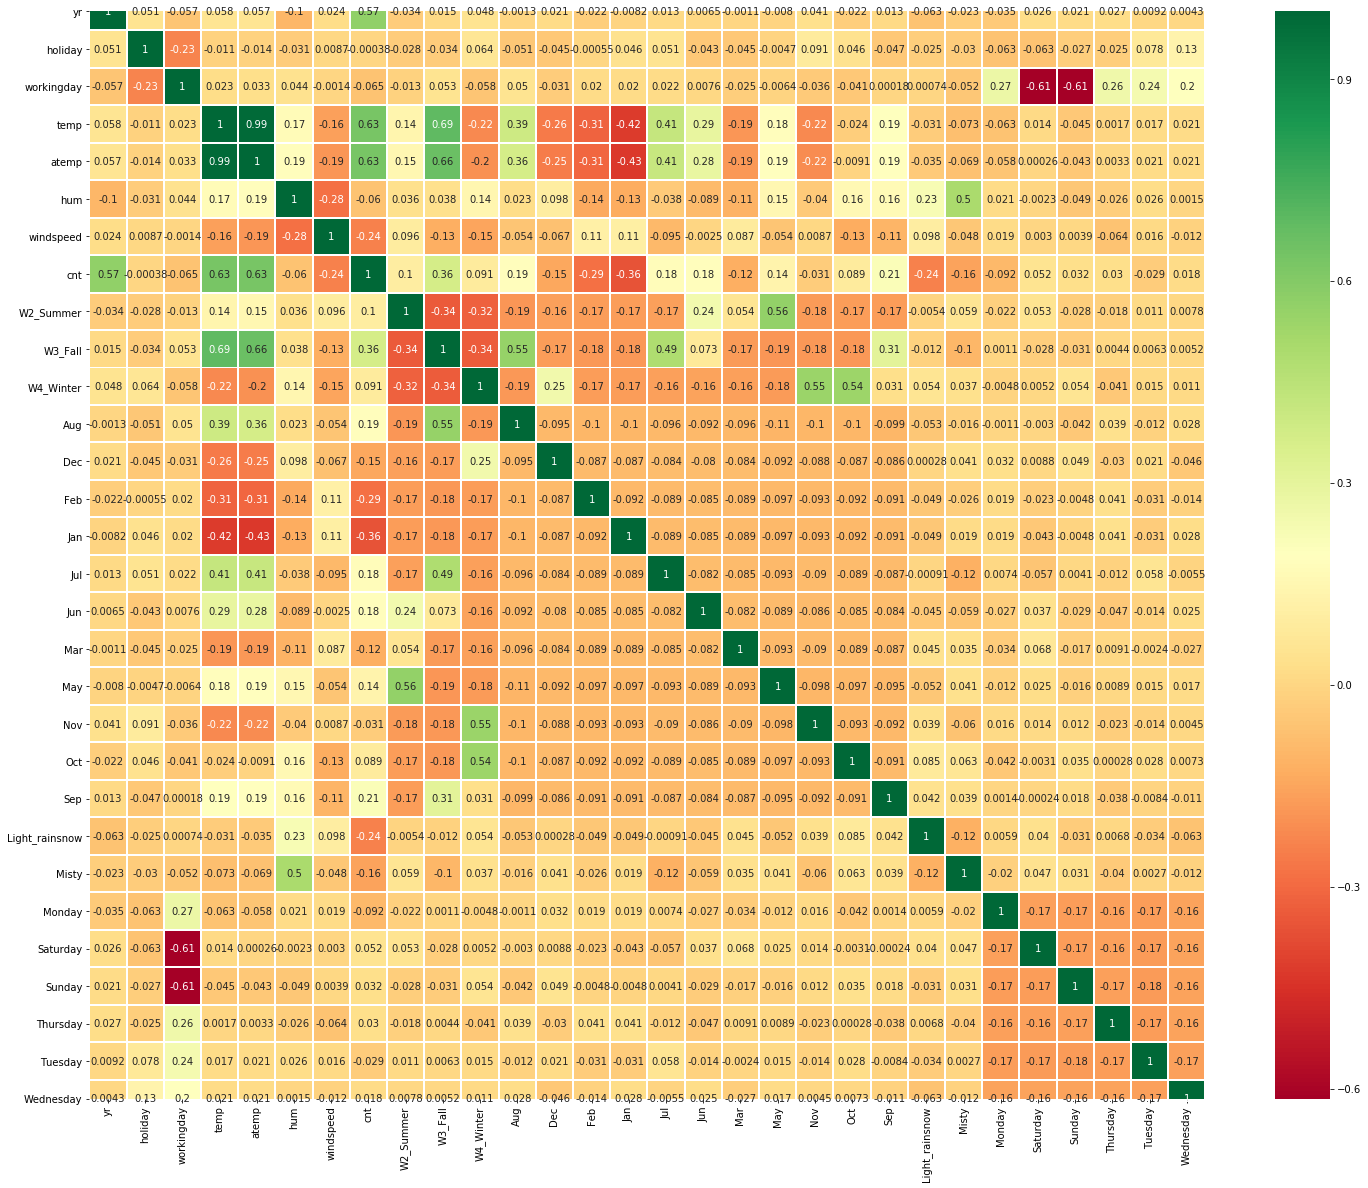

In [67]:
#### 4.3 Checking Correlation Coefficient
plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [68]:
#### Step 5: Building the Linear Model
### 5.1 Dividing into X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [69]:
#### 5.2 RFE
#### Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [70]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', False, 5),
 ('Jun', False, 14),
 ('Mar', False, 8),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 10),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 7),
 ('Wednesday', False, 12)]

In [71]:
# storing the selected 15 variables in col list
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'W2_Summer',
       'W3_Fall', 'W4_Winter', 'Nov', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday', 'Sunday'],
      dtype='object')

In [72]:
# checking which columns have been eleminated 
X_train.columns[~rfe.support_]

Index(['holiday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Oct', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [73]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [74]:
## 5.3 Manual Model Development using statsmodel
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [75]:
### 5.3.1 Model 1
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

Features     VIF
2             temp  389.55
3            atemp  368.26
4              hum   26.80
1       workingday   17.07
7          W3_Fall    6.98
5        windspeed    5.87
13        Saturday    4.23
14          Sunday    4.20
6        W2_Summer    3.45
8        W4_Winter    3.42
12           Misty    2.28
0               yr    2.03
9              Nov    1.70
10             Sep    1.28
11  Light_rainsnow    1.20

In [76]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.23e-182
Time:                        16:50:55   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     494   BIC:                            -897.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1914      0.040      4.

In [77]:
### 5.3.2 Model 2
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
3              hum  26.71
2             temp  23.35
1       workingday  16.95
6          W3_Fall   6.88
4        windspeed   5.64
12        Saturday   4.22
13          Sunday   4.17
5        W2_Summer   3.45
7        W4_Winter   3.42
11           Misty   2.27
0               yr   2.03
8              Nov   1.70
9              Sep   1.28
10  Light_rainsnow   1.20

In [78]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.23e-182
Time:                        16:51:30   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     494   BIC:                            -897.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1914      0.040      4.

In [79]:
### 5.3.3 Model 3
X_train_new = X_train_new.drop(['hum'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features    VIF
2             temp  20.26
1       workingday   9.63
5          W3_Fall   6.72
3        windspeed   5.61
4        W2_Summer   3.44
6        W4_Winter   3.38
11        Saturday   2.90
12          Sunday   2.83
0               yr   2.02
7              Nov   1.70
10           Misty   1.58
8              Sep   1.27
9   Light_rainsnow   1.07

In [80]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          4.15e-179
Time:                        16:51:56   Log-Likelihood:                 486.21
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     496   BIC:                            -885.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0860      0.034      2.

In [81]:
### 5.3.4 Model 4
X_train_new = X_train_new.drop(['W3_Fall'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
1       workingday  9.35
2             temp  6.70
3        windspeed  5.54
10        Saturday  2.84
11          Sunday  2.77
5        W4_Winter  2.09
0               yr  2.01
6              Nov  1.63
9            Misty  1.58
4        W2_Summer  1.57
7              Sep  1.21
8   Light_rainsnow  1.07

In [82]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.21e-177
Time:                        16:52:49   Log-Likelihood:                 479.98
No. Observations:                 510   AIC:                            -934.0
Df Residuals:                     497   BIC:                            -878.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0664      0.034      1.

In [83]:
###5.3.5 Model 5
X_train_new = X_train_new.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

Features   VIF
1       workingday  9.34
2             temp  6.65
3        windspeed  5.49
9         Saturday  2.83
10          Sunday  2.77
0               yr  2.01
4        W2_Summer  1.57
8            Misty  1.56
5        W4_Winter  1.51
6              Sep  1.20
7   Light_rainsnow  1.07

In [84]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.48e-178
Time:                        17:31:45   Log-Likelihood:                 479.37
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     498   BIC:                            -883.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0648      0.034      1.

In [87]:
###5.3.6 Model 6

# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.48e-178
Time:                        17:33:40   Log-Likelihood:                 479.37
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     498   BIC:                            -883.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0648      0.034      1.

In [88]:
# Checking the parameters obtained
lr6.params

const             0.064791
yr                0.230614
workingday        0.053153
temp              0.563233
windspeed        -0.156507
W2_Summer         0.080514
W4_Winter         0.125844
Sep               0.093971
Light_rainsnow   -0.304218
Misty            -0.075193
Saturday          0.079546
Sunday            0.077970
dtype: float64

In [90]:
####Step 6: Final Model Interpretation
#### Hypothesis Testing :
"""
Hypothesis Testing States that
H0:B1=B2=...=Bn=0
H1: at least one Bi!=0
"""
#### lr6 model coefficient values
"""
const             0.064791
yr                0.230614
workingday        0.053153
temp              0.563233
windspeed        -0.156507
W2_Summer         0.080514
W4_Winter         0.125844
Sep               0.093971
Light_rainsnow   -0.304218
Misty            -0.075193
Saturday          0.079546
Sunday            0.077970
"""


### From the lr6 model summary, it is evident that all our coefficients are not equal to zero, which means we REJECT the NULL HYPOTHESIS

'\nconst             0.064791\nyr                0.230614\nworkingday        0.053153\ntemp              0.563233\nwindspeed        -0.156507\nW2_Summer         0.080514\nW4_Winter         0.125844\nSep               0.093971\nLight_rainsnow   -0.304218\nMisty            -0.075193\nSaturday          0.079546\nSunday            0.077970\n'

In [91]:
#### F-Staitsics :F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.
"""
F-Statistics : 233.6
Prob (F-statistic): 4.48e-181
The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
"""

"\nF-Statistics : 233.6\nProb (F-statistic): 4.48e-181\nThe F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant\n"

In [92]:
### Step 7: Model Validation
"""
Step 7: Model Validation
Validating the assumption of Linear Regression Model :

Linear Relationship
Homoscedasticity
Absence of Multicollinearity
Independence of residuals
Normality of Errors
</span>
"""


'\nStep 7: Model Validation\nValidating the assumption of Linear Regression Model :\n\nLinear Relationship\nHomoscedasticity\nAbsence of Multicollinearity\nIndependence of residuals\nNormality of Errors\n</span>\n'

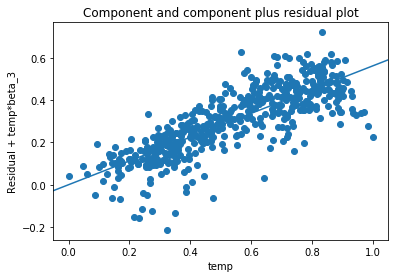

In [93]:
### 7.1 Linear Relationship
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

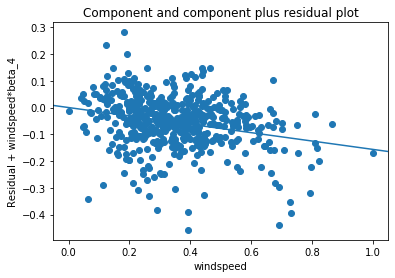

In [94]:
sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

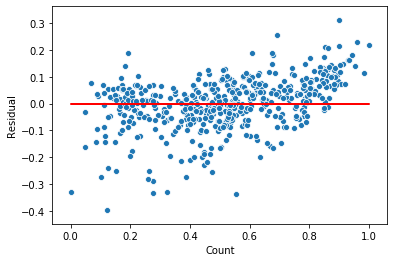

In [95]:
### 7.2 Homoscedasticity
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

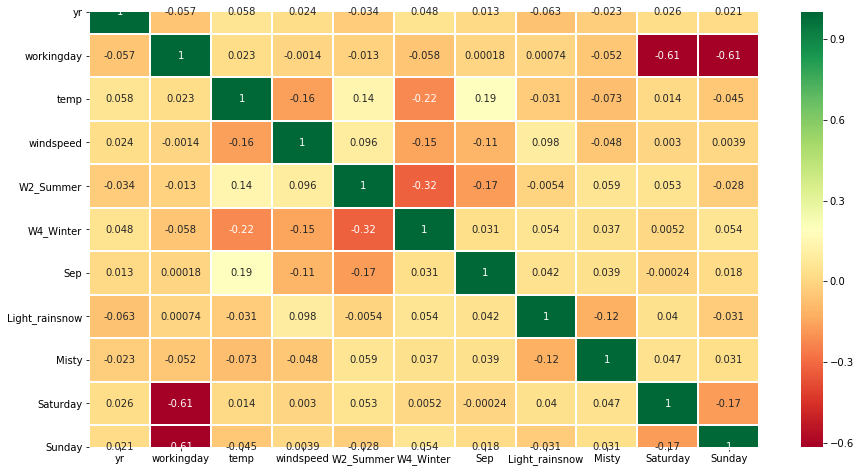

In [96]:
### 7.3 Absence of Multicolinearity
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [97]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

Features   VIF
1       workingday  9.34
2             temp  6.65
3        windspeed  5.49
9         Saturday  2.83
10          Sunday  2.77
0               yr  2.01
4        W2_Summer  1.57
8            Misty  1.56
5        W4_Winter  1.51
6              Sep  1.20
7   Light_rainsnow  1.07

In [99]:
### 7.4 Independence of residuals
"""
Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.

0 – 2: positive auto-correlation
2 – 4: negative auto-correlation)
"""


'\nAutocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables.\n\n0 – 2: positive auto-correlation\n2 – 4: negative auto-correlation)\n'

In [100]:
print('The Durbin-Watson value for Final Model lr 6 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model lr 6 is 2.0507


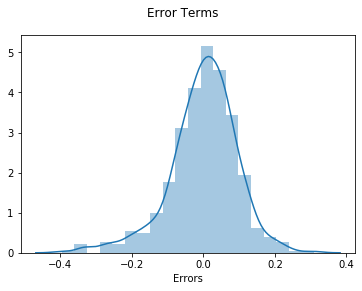

In [101]:
#### 7.5 Normality of error
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

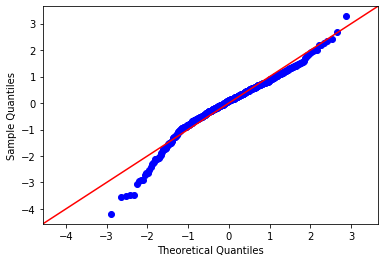

In [102]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

In [103]:
####Step 8: Making Predictions using final model
"""
Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, as we want to use the metrics that the model learned from the training data to be applied on the test data.In other words, we want to prevent the information leak from train to test dataset.
"""
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
22    0        0           1  0.046591  0.025950  0.453529   0.462217   
468   1        0           0  0.543115  0.536771  0.522511   0.347424   
553   1        0           1  0.951196  0.933712  0.596104   0.212829   
504   1        0           1  0.699909  0.662746  0.551083   0.478229   
353   0        0           1  0.407087  0.416610  0.618615   0.080770   

          cnt  W2_Summer  W3_Fall  ...  Oct  Sep  Light_rainsnow  Misty  \
22   0.110907          0        0  ...    0    0               0      0   
468  0.855729          1        0  ...    0    0               0      0   
553  0.534975          0        1  ...    0    0               0      0   
504  0.817648          1        0  ...    0    0               0      0   
353  0.428900          0        0  ...    0    0               0      1   

     Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
22        0         0       0         0        1          0  
468       0         0       1         0        0          0  
553       1         0       0         0        0          0  
504       1         0       0         0        0          0  
353       0         0       0         1        0          0  

[5 rows x 30 columns]

In [104]:
bike_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.495455    0.040909    0.690909    0.550981    0.527344    0.662328   
std      0.501120    0.198531    0.463173    0.228967    0.214959    0.143278   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.357562    0.352129    0.553355   
50%      0.000000    0.000000    1.000000    0.557133    0.546299    0.661688   
75%      1.000000    0.000000    1.000000    0.750530    0.707506    0.761905   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt   W2_Summer     W3_Fall  ...         Oct  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.346015    0.519816    0.268182    0.245455  ...    0.086364   
std      0.159517    0.219880    0.444023    0.431338  ...    0.281541   
min      0.073090    0.055683    0.000000    0.000000  ...    0.000000   
25%      0.232051    0.364818    0.000000    0.000000  ...    0.000000   
50%      0.327568    0.525943    0.000000    0.000000  ...    0.000000   
75%      0.435172    0.683128    1.000000    0.000000  ...    0.000000   
max      0.824380    0.963300    1.000000    1.000000  ...    1.000000   

              Sep  Light_rainsnow       Misty      Monday    Saturday  \
count  220.000000      220.000000  220.000000  220.000000  220.000000   
mean     0.081818        0.036364    0.322727    0.150000    0.140909   
std      0.274713        0.187620    0.468586    0.357886    0.348721   
min      0.000000        0.000000    0.000000    0.000000    0.000000   
25%      0.000000        0.000000    0.000000    0.000000    0.000000   
50%      0.000000        0.000000    0.000000    0.000000    0.000000   
75%      0.000000        0.000000    1.000000    0.000000    0.000000   
max      1.000000        1.000000    1.000000    1.000000    1.000000   

           Sunday    Thursday     Tuesday   Wednesday  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.136364    0.150000    0.122727    0.168182  
std      0.343957    0.357886    0.328872    0.374881  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]

In [105]:
### 8.2 Dividing X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

In [106]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 12 columns):
const             220 non-null float64
yr                220 non-null int64
workingday        220 non-null int64
temp              220 non-null float64
windspeed         220 non-null float64
W2_Summer         220 non-null uint8
W4_Winter         220 non-null uint8
Sep               220 non-null uint8
Light_rainsnow    220 non-null uint8
Misty             220 non-null uint8
Saturday          220 non-null uint8
Sunday            220 non-null uint8
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [107]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

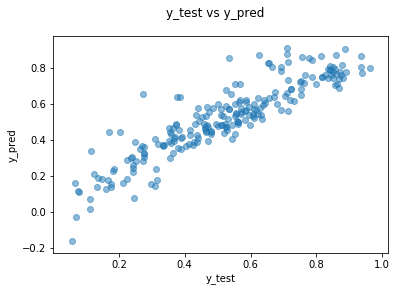

In [108]:
### Step 9: Model Evaluation
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 

In [109]:
### R2 Value Calculation for bike_test dataframe
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8136

In [110]:
#Adjusted R2 Value Calculation for bike_test dataframe
#R2adj=1− (1-R2) x (n-1)/(n-p-1)
 

In [111]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.8037

In [112]:
### Model Train & Test R2 Statsitics Comparison
"""
Measurement	Train Dataset	Test Dataset
R2 Value	82.4%	82%
Adjusted R2 Value	82.1%	81.2%
"""
###It seems to be really a good model that can generalize various datasets.
###Calculating RMSE for the selected Model
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0947

In [113]:
###Calculating Mean Absolute Error for the selected Model
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0734

In [ ]:
###Model Outcome Summary
"""
As per the final model, the top 5 predictor variables that influences bike booking are:
Temperature (Temp)
A coefficient value of ‘0.563233’ indicated that a temperature has significant impact on bike rentals
Light Rain & Snow (weathersit =3)
A coefficient value of ‘-0.304218’ indicated that the light snow and rain deters people from renting out bikes
Year (yr)
A coefficient value of ‘0.230614’ indicated that a year wise the rental numbers are increasing

It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.
As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.
"""